In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\rudra\Downloads\lungcancer_dataset.csv")
data.head(2)

,Unnamed: 0,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES


In [3]:
data.drop(columns='Unnamed: 0',inplace=True)
data.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES


In [4]:
data.shape

(276, 16)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC_DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL_CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS_OF_BREATH    276 non-null    int64 
 13  SWALLOWING_DIFFICULTY  276 non-null    int64 
 14  CHEST_PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [5]:
data.isnull().sum().sum()

np.int64(0)

In [6]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [7]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [8]:
data.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES


In [9]:
data.columns=[i.strip() for i in data.columns]
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

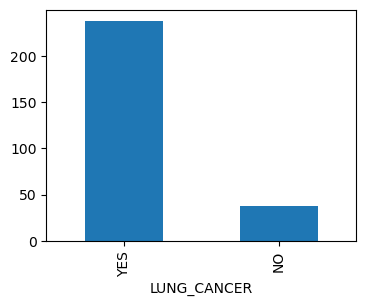

In [10]:
plt.figure(figsize=(4,3))
data['LUNG_CANCER'].value_counts().plot(kind='bar')
plt.show()

In [11]:
data['LUNG_CANCER']=data['LUNG_CANCER'].replace({'YES':1,
                                                 'NO':0})
data['LUNG_CANCER'].unique()                          

array([1, 0])

In [12]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [13]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
ct=ColumnTransformer([
    ('one',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),['GENDER']),
    ('scale',StandardScaler(),['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                               'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY', 'CHEST_PAIN'])
])
ct

ColumnTransformer(transformers=[('one',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['GENDER']),
                                ('scale', StandardScaler(),
                                 ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
                                  'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE',
                                  'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING',
                                  'COUGHING', 'SHORTNESS_OF_BREATH',
                                  'SWALLOWING_DIFFICULTY', 'CHEST_PAIN'])])

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
lr_pipe=Pipeline([
    ('ct',ct),
    ('model',LogisticRegression(class_weight='balanced'))
])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=7)
lr_pipe.fit(x_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('one',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['GENDER']),
                                                 ('scale', StandardScaler(),
                                                  ['AGE', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('model', LogisticRegression(class_weight='balanced'))])

In [15]:
lr_pipe.score(x_train,y_train)*100,lr_pipe.score(x_test,y_test)*100

(88.70967741935483, 92.85714285714286)

In [16]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
cm=confusion_matrix(y_test,lr_pipe.predict(x_test))
cm

array([[ 5,  2],
       [ 0, 21]])

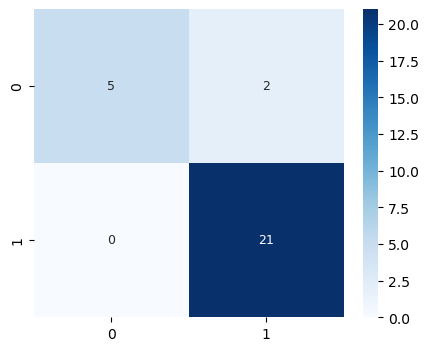

In [17]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,annot_kws={'size':9},cmap='Blues')
plt.show()

In [18]:
print(precision_score(y_test,lr_pipe.predict(x_test))*100)
print(recall_score(y_test,lr_pipe.predict(x_test))*100)
print(f1_score(y_test,lr_pipe.predict(x_test))*100)

91.30434782608695
100.0
95.45454545454545


## Svm Model

In [19]:
from sklearn.svm import SVC
svm_pipe=Pipeline([
    ('ct',ct),
    ('model',SVC(class_weight='balanced',kernel='rbf',gamma='scale'))
])
svm_pipe.fit(x_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('one',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['GENDER']),
                                                 ('scale', StandardScaler(),
                                                  ['AGE', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('model', SVC(class_weight='balanced'))])

In [20]:
svm_pipe.score(x_train,y_train)*100,svm_pipe.score(x_test,y_test)*100

(92.74193548387096, 92.85714285714286)

In [21]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
cm=confusion_matrix(y_test,svm_pipe.predict(x_test))
cm

array([[ 5,  2],
       [ 0, 21]])

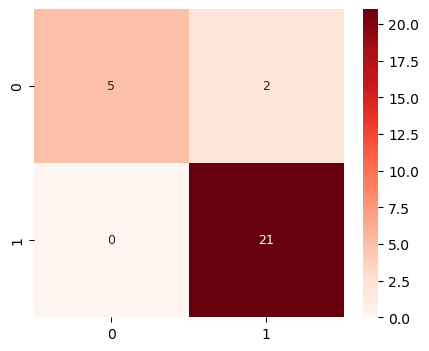

In [22]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,annot_kws={'size':9},cmap='Reds')
plt.show()

In [23]:
print(precision_score(y_test,svm_pipe.predict(x_test))*100)
print(recall_score(y_test,svm_pipe.predict(x_test))*100)
print(f1_score(y_test,svm_pipe.predict(x_test))*100)

91.30434782608695
100.0
95.45454545454545


In [24]:
import pickle
pickle.dump(svm_pipe,open('lungcancer.pkl','wb'))
pipe=pickle.load(open('lungcancer.pkl','rb'))
pipe.predict(pd.DataFrame([['F',63,1,2,1,1,1,1,1,2,1,2,2,1,1]],columns=x_train.columns))	

array([0])

## Knn Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_pipe=Pipeline([
    ('ct',ct),
    ('model',KNeighborsClassifier(n_neighbors=6,weights='uniform'))
])
knn_pipe.fit(x_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('one',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['GENDER']),
                                                 ('scale', StandardScaler(),
                                                  ['AGE', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('model', KNeighborsClassifier(n_neighbors=6))])

In [26]:
knn_pipe.score(x_train,y_train)*100,knn_pipe.score(x_test,y_test)*100

(93.54838709677419, 89.28571428571429)

In [27]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
cm=confusion_matrix(y_test,knn_pipe.predict(x_test))
cm

array([[ 4,  3],
       [ 0, 21]])

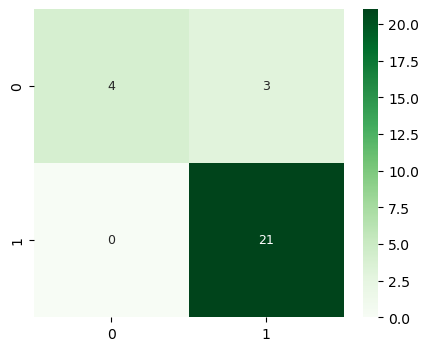

In [28]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,annot_kws={'size':9},cmap='Greens')
plt.show()

In [29]:
print(precision_score(y_test,knn_pipe.predict(x_test))*100)
print(recall_score(y_test,knn_pipe.predict(x_test))*100)
print(f1_score(y_test,knn_pipe.predict(x_test))*100)

87.5
100.0
93.33333333333333


## Naive Bayes Model

In [30]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
gnb_pipe=Pipeline([
    ('ct',ct),
    ('model',GaussianNB())
])
gnb_pipe.fit(x_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('one',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['GENDER']),
                                                 ('scale', StandardScaler(),
                                                  ['AGE', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('model', GaussianNB())])

In [31]:
gnb_pipe.score(x_train,y_train)*100,gnb_pipe.score(x_test,y_test)*100

(89.51612903225806, 85.71428571428571)

In [32]:
cm=confusion_matrix(y_test,gnb_pipe.predict(x_test))
cm

array([[ 3,  4],
       [ 0, 21]])

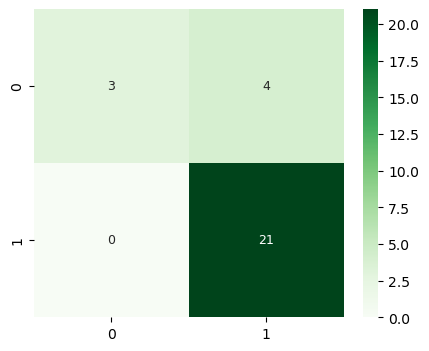

In [33]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,annot_kws={'size':9},cmap='Greens')
plt.show()

In [34]:
print(precision_score(y_test,gnb_pipe.predict(x_test))*100)
print(recall_score(y_test,gnb_pipe.predict(x_test))*100)
print(f1_score(y_test,gnb_pipe.predict(x_test))*100)

84.0
100.0
91.30434782608695
